In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import patsy # to build design matrix
import statsmodels.api as sm
import matplotlib.patches as mpatches


from paper_behavior_functions import (query_sessions_around_criterion,
                                      seaborn_style, institution_map,
                                      group_colors, figpath, EXAMPLE_MOUSE,
                                      FIGURE_WIDTH, FIGURE_HEIGHT,
                                      dj2pandas, plot_psychometric)
from pylab import cm

# Load some things from paper_behavior_functions
figpath = figpath()
seaborn_style()
pal = group_colors()
# Create an array with the colors we want to use
colors = [[0.92,0.68,0.0353],[0.8,0,0.2]]
colors1 = [[0.8,0,0.2], [0.92,0.68,0.0353]]

# Set custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))


customPalette1 = sns.set_palette(sns.color_palette(colors1))


dataChip14 = pd.read_csv (r'ExperimentalDataChip14.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
simulationsChip14Hyper = pd.read_csv (r'SimulationsChip14Hyper.csv') 
simulationsChip14Normo = pd.read_csv (r'SimulationsChip14Normo.csv') 
predictionChip14DoseB = pd.read_csv (r'PredictionChip14doseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
predictionsChip14HyperDoseB = pd.read_csv (r'PredictionsChip14HyperDoseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
predictionsChip14NormoDoseB = pd.read_csv (r'PredictionsChip14NormoDoseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the
predictionsChip14DifferenceDoseB = pd.read_csv (r'PredictionsChip14DifferenceDoseB.csv')   #read the csv file (put 'r' before the path string to address any special characters in the
print(predictionChip14DoseB)


/Users/belca27/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


   time_total  time_GTT  Glucose_mean  Glucose_SEM  Insulin_mean  Insulin_SEM  \
0       288.0       0.0     11.166833     0.669874         21.50         2.78   
1       312.0      24.0      7.984167     0.198015         12.53         3.00   
2       336.0      48.0      7.980500     0.081506          7.07         3.05   
3       359.9      71.9      6.414833     0.115875          3.72         3.49   
4       288.0       0.0      9.997170     1.378520         21.53         2.78   
5       312.0      24.0      8.081330     1.379140         12.81         3.00   
6       336.0      48.0      7.082170     1.324510          7.04         3.15   
7       359.9      71.9      6.383670     1.441720          3.43         3.23   

   Glucose_diff_mean  Glucose_diff_SEM  Insulin   SEM Glycemic_level  
0           1.169663         -0.708646    21.50  2.78  Hyperglycemia  
1          -0.097163         -1.181125    12.53  3.00  Hyperglycemia  
2           0.898330         -1.243004     7.07  3.05  Hy

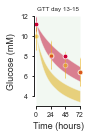

In [4]:
# Plot glucose prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, 
                    hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

fig.map(plt.errorbar, "time_GTT", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# 
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)#                                         
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[0])

# Overlay shaded area to indicate prediction

rect=mpatches.Rectangle((0,0),72,12, 
                        alpha=0.05,
                        facecolor='green')

plt.gca().add_patch(rect)

plt.text(36, 12.5, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH1doseB.pdf"))



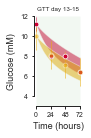

In [5]:
# Plot glucose prediction Hypothesis 2

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

fig.map(plt.errorbar, "time_GTT", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# 
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)#     
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),72,12, 
                        alpha=0.05,
                        facecolor='green')

plt.text(36, 12.5, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

plt.gca().add_patch(rect)

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_yticks([4,6,8,10,12])
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH2doseB.pdf"))


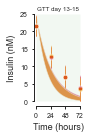

In [7]:
# Plot insulin prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette1,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# overlay the simulated
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H1_I_min_nM', y2='H1_I_max_nM', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H1_I_min_nM', y2='H1_I_max_nM', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),72,25, 
                        alpha=0.05,
                        facecolor='green')
plt.gca().add_patch(rect)

plt.text(36, 26, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Insulin (nM)')
fig.ax.set_xticks([0,24,48,72])
#fig.ax.set_xlim(280,370)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionInsulinH1doseB.pdf"))


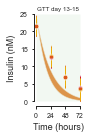

In [8]:
# Plot insulin prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# overlay the simulated
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H2_I_min_nM', y2='H2_I_max_nM', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H2_I_min_nM', y2='H2_I_max_nM', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),72,25, 
                        alpha=0.05,
                        facecolor='green')
plt.gca().add_patch(rect)

plt.text(36, 26, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Insulin (nM)')
fig.ax.set_xticks([0,24,48,72])
#fig.ax.set_xlim(280,370)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionInsulinH2doseB.pdf"))

/Users/belca27/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


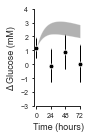

In [4]:
# Plot glucose difference prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Glucose_diff_mean", "Glucose_diff_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14DoseB,
             x='time_GTT', y='Glucose_diff_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14DifferenceDoseB, x='time_GTT', y1='H1_G_diff_min', y2='H1_G_diff_max', alpha=0.3, 
                    facecolor=colors[0])

fig.set_axis_labels('Time (hours)', '\u0394 Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_ylim(-3,4)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseDiffH1doseB.pdf"))

/Users/belca27/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


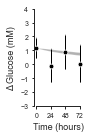

In [3]:
# Plot glucose difference prediction Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Glucose_diff_mean", "Glucose_diff_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14DoseB,
             x='time_GTT', y='Glucose_diff_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14DifferenceDoseB, x='time_GTT', y1='H2_G_diff_min', y2='H2_G_diff_max', alpha=0.3, 
                    facecolor=colors[0])

fig.set_axis_labels('Time (hours)', '\u0394 Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_ylim(-3,4)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseDiffH2doseB.pdf"))